---------------

**If any part of this notebook is used in your research, please cite with the reference found in** **[README.md](https://github.com/pysal/spaghetti#bibtex-citation).**


----------------

## Network-constrained spatial dependence
### Demonstrating cluster detection along networks with the *K* function

**Author: James D. Gaboardi** **<jgaboardi@gmail.com>**

**This notebook is an advanced walk-through for:**

1. Understanding the global auto *K* function elementary geometric objects
2. Basic example with synthetic data 
3. Empirical example 

In [1]:
%load_ext watermark
%watermark

2020-04-26T11:07:23-04:00

CPython 3.7.3
IPython 7.10.2

compiler   : Clang 9.0.0 (tags/RELEASE_900/final)
system     : Darwin
release    : 19.4.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [2]:
import esda
import geopandas
import libpysal
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import numpy
import spaghetti
import warnings
%matplotlib inline
%watermark -w
%watermark -iv

watermark 2.0.2
matplotlib_scalebar 0.6.1
libpysal            4.2.2
esda                2.2.1
geopandas           0.7.0
spaghetti           1.4.2.post2
numpy               1.18.1
matplotlib          3.1.2



In [3]:
try:
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats("retina")
except ImportError:
    pass

--------------

### Instantiating a `spaghetti.Network` object and point patterns
#### Instantiate the network from a `.shp` file

In [4]:
ntw = spaghetti.Network(in_data=libpysal.examples.get_path("streets.shp"))

#### Associate the network with point patterns

-------------------

### 1. .....

### quick paragraph on clustering.....

### look at RDC proposal fro 1866

#### *k* function looks at all pairwise distances

### 

---------------------

### ##. Network-constrained observation cluster testing — *K* function

#### Results plotting helper

In [5]:
def plot_k(k, _arcs, df1, df2, obs_name, scale=True):
    
    # function plot
    fig, arr = plt.subplots(1, 2, figsize=(14, 7))
    arr[0].plot(k.xaxis, k.observed, "b-", linewidth=1.5, label="Observed")
    arr[0].plot(k.xaxis, k.upperenvelope, "r--", label="Upper")
    arr[0].plot(k.xaxis, k.lowerenvelope, "k--", label="Lower")
    arr[0].legend(loc="best", fontsize="x-large")
    title_text = "Global Auto $K$ Function: %s\n" % obs_name
    title_text += "%s steps, %s permutations," % (k.nsteps, k.permutations)
    title_text += " %s distribution" % k.distribution
    fig.suptitle(title_text, fontsize="xx-large")
    arr[0].set_xlabel("Distance $(r)$", fontsize="x-large")
    arr[0].set_ylabel("$K(r)$", fontsize="x-large")
    # spatial plot
    base = _arcs.plot(ax=arr[1], color="k", alpha=0.25)
    df1.plot(ax=base, color="g", markersize=30, alpha=0.25)
    df2.plot(ax=base, color="g", marker="x", markersize=100, alpha=0.5)
    
    # legend under geoplot
    # horizontal -- 2 columns -- "OBS NAME" Locations - Empirical (#) and network-snapped (#)
    
    # add scale bar ------------------------------------------- carto elements
    if scale:
        scalebar = ScaleBar(1, units="m", location="lower left")
        arr[1].add_artist(scalebar)
    arr[1].set_xticklabels([]); arr[1].set_xticks([]);
    arr[1].set_yticklabels([]); arr[1].set_yticks([]);

In [6]:
p1, p2 = libpysal.cg.Point((0,0)), libpysal.cg.Point((2,2))
ntw = spaghetti.Network(libpysal.cg.Chain([p1, p2]))
ntw.snapobservations([p1, p1, p2, p2, p2, p2, p2], "eqtri_midps")

In [7]:
vertices_df, arcs_df = spaghetti.element_as_gdf(
    ntw, vertices=ntw.vertex_coords, arcs=ntw.arcs
)
eqv = spaghetti.element_as_gdf(ntw, pp_name="eqtri_midps")
eqv_snapped = spaghetti.element_as_gdf(ntw, pp_name="eqtri_midps", snapped=True)

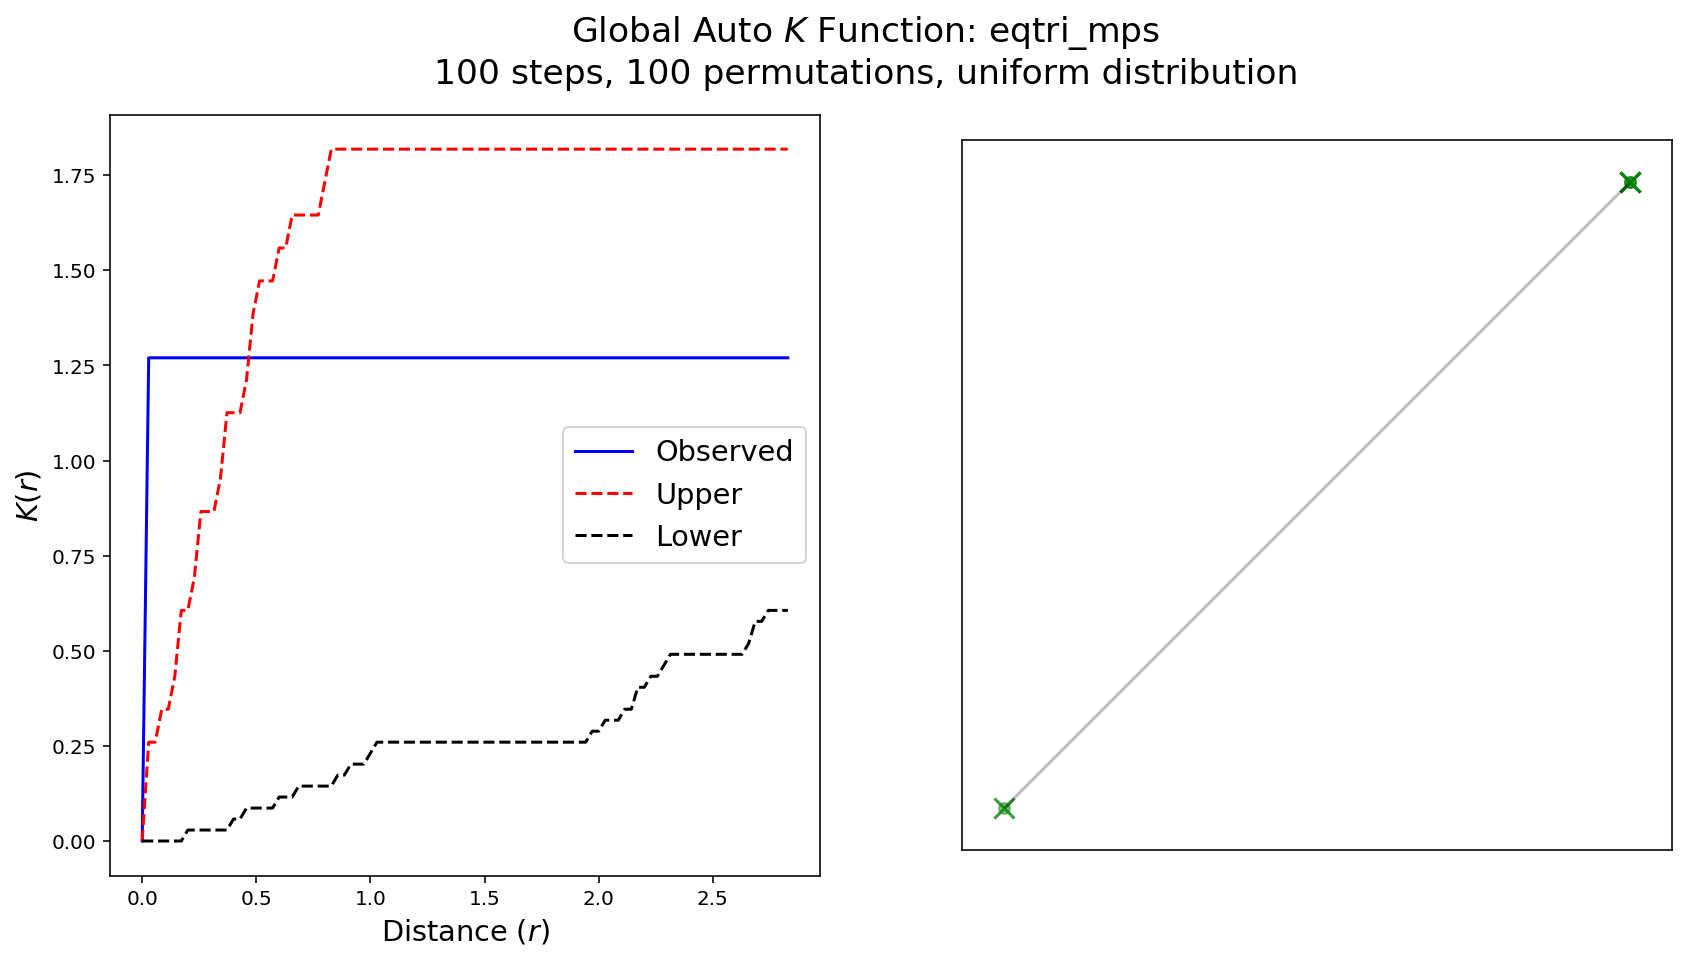

In [8]:
numpy.random.seed(0)
kres = ntw.GlobalAutoK(
    ntw.pointpatterns["eqtri_midps"],
    nsteps=100,
    permutations=100)
plot_k(kres, arcs_df, eqv, eqv_snapped, "eqtri_mps", scale=False)

##### Equilateral triangle

In [9]:
def equilateral_triangle(x1, y1, x2, mids=True):
    """Return an equilateral triangle and its side midpoints."""
    x3 = (x1+x2)/2.
    y3 = numpy.sqrt((x1-x2)**2 - (x3-x1)**2) + y1
    p1, p2, p3 = (x1, y1), (x2, y1), (x3, y3)
    eqitri = libpysal.cg.Chain([p1, p2, p3, p1])
    if mids:
        eqvs = eqitri.vertices[:-1]
        eqimps, vcount = [], len(eqvs), 
        for i in range(vcount):
            for j in range(i+1, vcount):
                (_x1, _y1), (_x2, _y2) = eqvs[i], eqvs[j]
                mp = libpysal.cg.Point(((_x1+_x2)/2., (_y1+_y2)/2.))
                eqimps.append(mp)
    return eqitri, eqimps

In [10]:
eqtri_sides, eqtri_midps = equilateral_triangle(0., 0., 6., 1)

In [11]:
ntw = spaghetti.Network(eqtri_sides)
ntw.snapobservations(eqtri_midps, "eqtri_midps")

In [12]:
vertices_df, arcs_df = spaghetti.element_as_gdf(
    ntw, vertices=ntw.vertex_coords, arcs=ntw.arcs
)
eqv = spaghetti.element_as_gdf(ntw, pp_name="eqtri_midps")
eqv_snapped = spaghetti.element_as_gdf(ntw, pp_name="eqtri_midps", snapped=True)

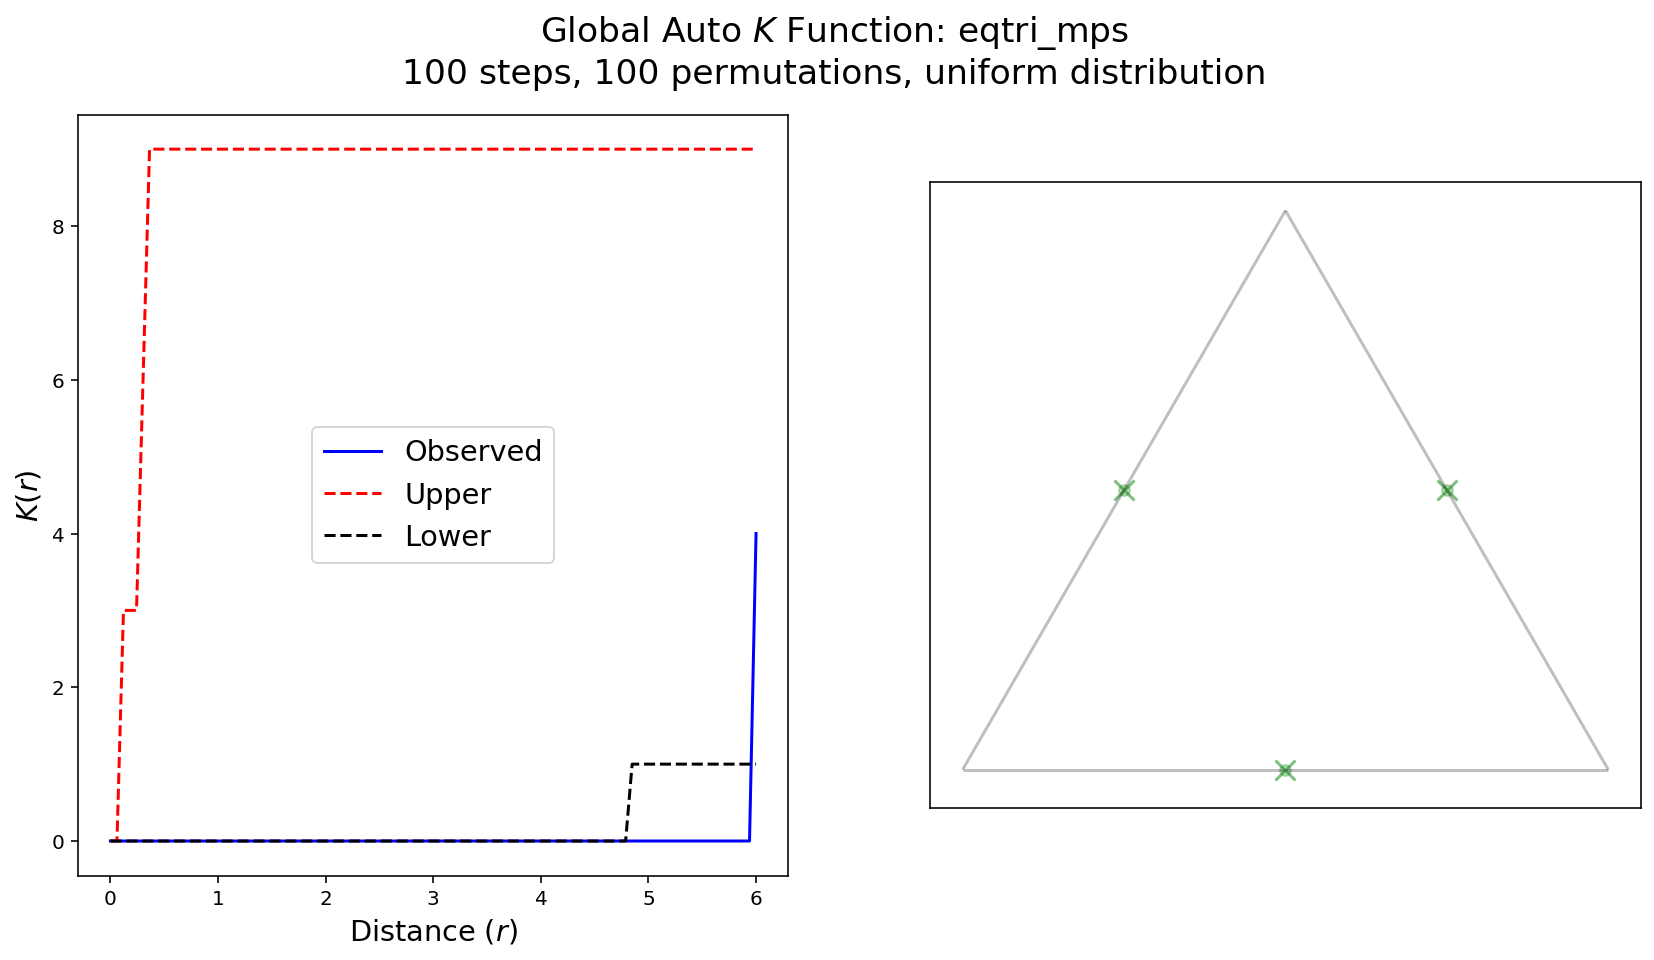

In [13]:
numpy.random.seed(0)
kres = ntw.GlobalAutoK(
    ntw.pointpatterns["eqtri_midps"],
    nsteps=100,
    permutations=100)
plot_k(kres, arcs_df, eqv, eqv_snapped, "eqtri_mps", scale=False)

**Interpretation:**
 * **This example demonstrates a complete lack of clustering with a strong indication of dispersion when approaching 5 units of distance.**

--------------------------

### 3. Empircal examples
#### Instantiate the network from a `.shp` file

In [14]:
ntw = spaghetti.Network(in_data=libpysal.examples.get_path("streets.shp"))
vertices_df, arcs_df = spaghetti.element_as_gdf(
    ntw, vertices=ntw.vertex_coords, arcs=ntw.arcs
)

#### Associate the network with point patterns

In [15]:
for pp_name in ["crimes", "schools"]:
    pp_shp = libpysal.examples.get_path("%s.shp" % pp_name)
    ntw.snapobservations(pp_shp, pp_name, attribute=True)
ntw.pointpatterns

{'crimes': <spaghetti.network.PointPattern at 0x130b4c8d0>,
 'schools': <spaghetti.network.PointPattern at 0x12c9ad438>}

##### Empircal — schools

In [16]:
schools = spaghetti.element_as_gdf(ntw, pp_name="schools")
schools_snapped = spaghetti.element_as_gdf(ntw, pp_name="schools", snapped=True)

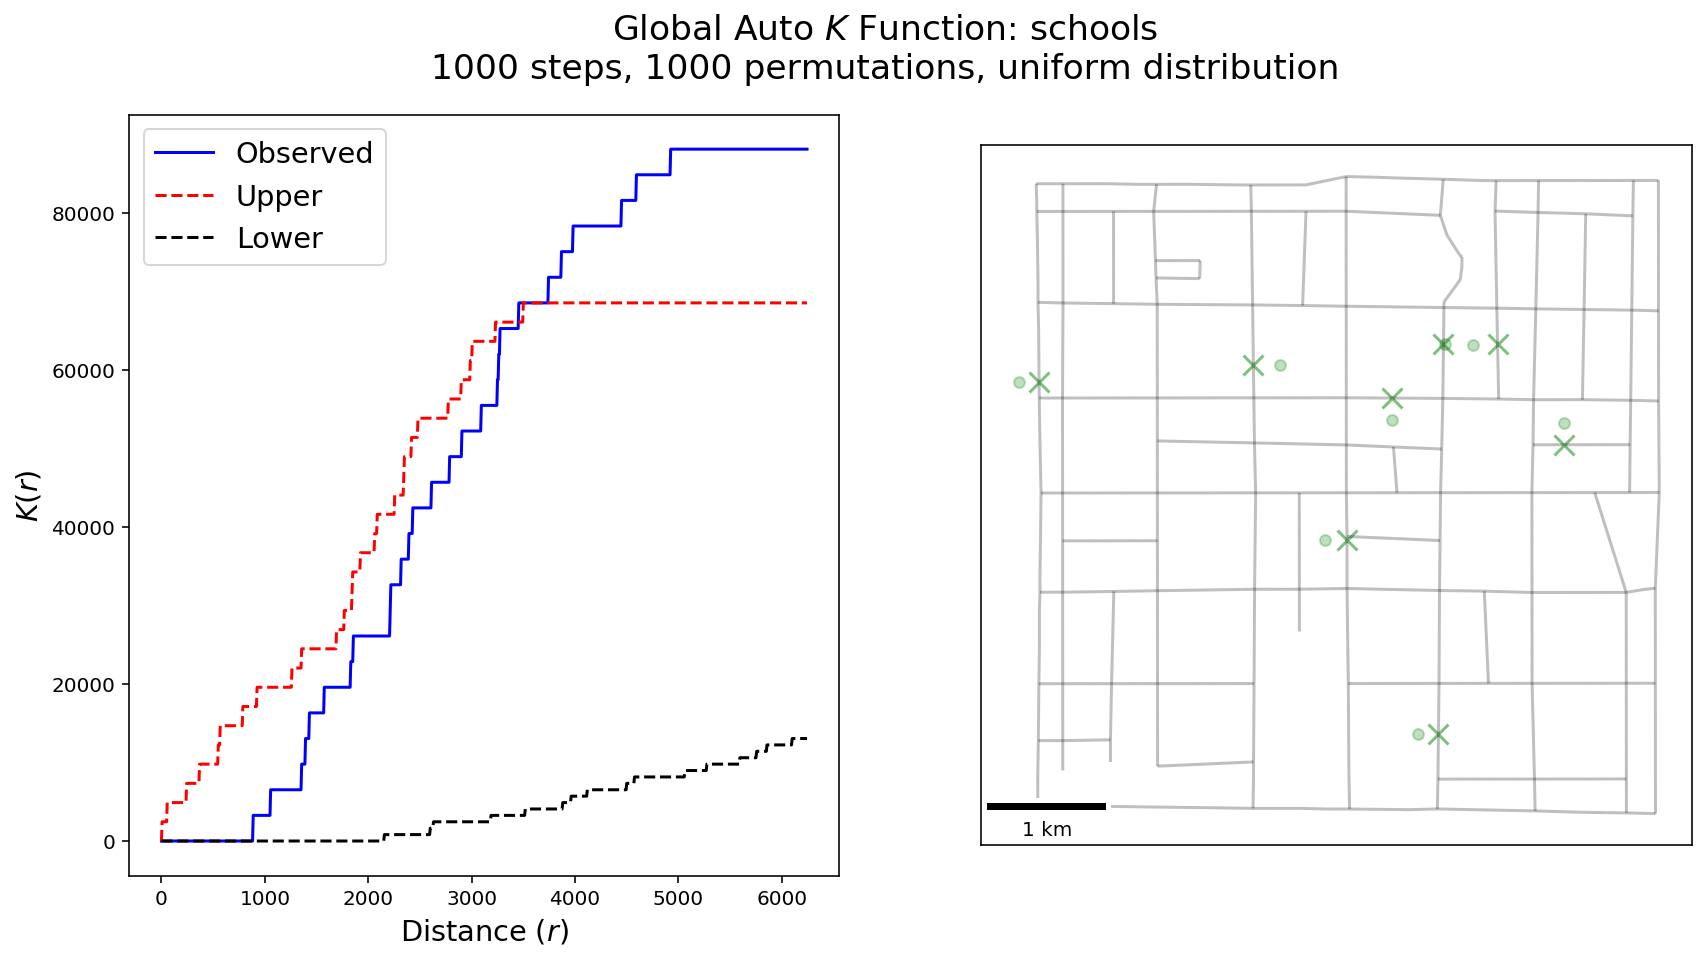

In [17]:
numpy.random.seed(0)
kres = ntw.GlobalAutoK(
    ntw.pointpatterns["schools"],
    nsteps=1000,
    permutations=1000)
plot_k(kres, arcs_df, schools, schools_snapped, "schools")

**Interpretation.... this is what we can infer here....**

#### Empircal — crimes

In [18]:
crimes = spaghetti.element_as_gdf(ntw, pp_name="crimes")
crimes_snapped = spaghetti.element_as_gdf(ntw, pp_name="crimes", snapped=True)

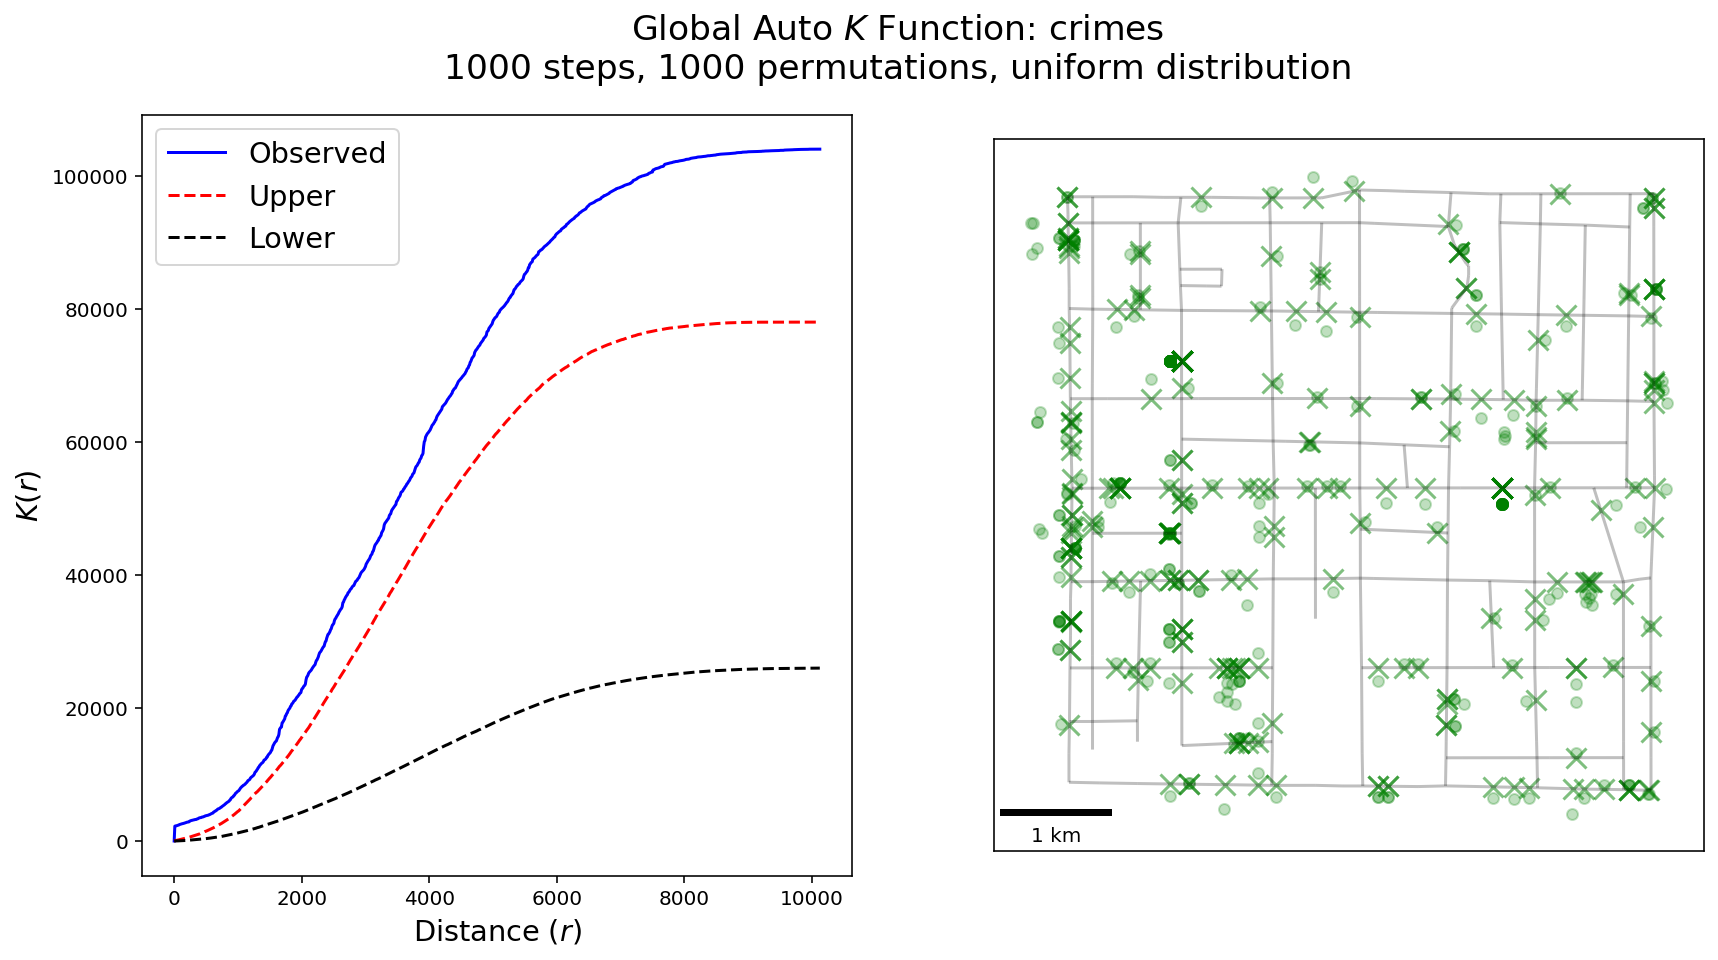

In [19]:
numpy.random.seed(0)
kres = ntw.GlobalAutoK(
    ntw.pointpatterns["crimes"],
    nsteps=1000,
    permutations=1000)
plot_k(kres, arcs_df, crimes, crimes_snapped, "crimes")

**Interpretation.... this is what we can infer here....**

-----------